In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.model_selection import train_test_split
import scipy.stats
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import confusion_matrix,classification_report,roc_curve
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict,cross_val_score,GridSearchCV,train_test_split
import warnings
warnings.simplefilter(action='ignore')

In [4]:
hr=pd.read_excel('DS2_C5_S5_HR_Data_Practice.xlsx')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,salary_num
0,0.38,0.53,2,157,3,0,1,0,sales,low,4649
1,0.80,0.86,5,262,6,0,1,0,sales,medium,34126
2,0.11,0.88,7,272,4,0,1,0,sales,medium,40522
3,0.72,0.87,5,223,5,0,1,0,sales,low,6916
4,0.37,0.52,2,159,3,0,1,0,sales,low,10928


### Task 1

<AxesSubplot:xlabel='salary'>

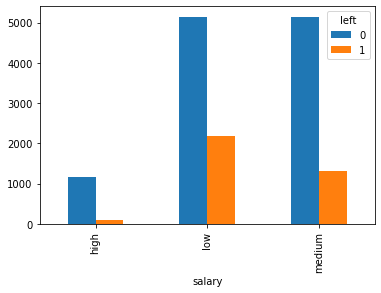

In [5]:
pd.crosstab(hr['salary'],hr['left']).plot(kind='bar')

left,0,1
Department,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


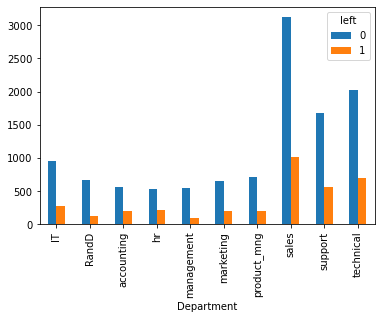

In [6]:
salarycross=pd.crosstab(hr['Department'],hr['left'])
salarycross.plot(kind='bar')
salarycross

### Task 2

In [7]:
hr.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
salary_num               0
dtype: int64

In [8]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
 10  salary_num             14999 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


In [9]:
cat=hr.select_dtypes(include='object')

<AxesSubplot:>

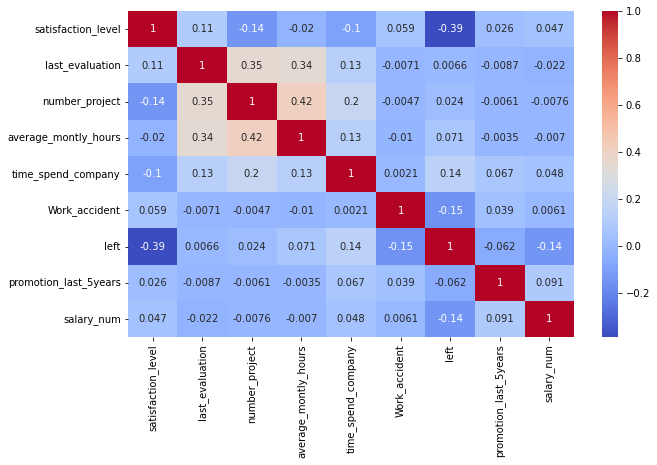

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(hr.corr(),annot=True,cmap='coolwarm')

In [11]:
label_encoder=preprocessing.LabelEncoder()
label_encoder.fit(hr['Department'])
hr['Department']=label_encoder.transform(hr['Department'])

In [12]:
label_encoder=preprocessing.LabelEncoder()
label_encoder.fit(hr['salary'])
hr['salary']=label_encoder.transform(hr['salary'])

In [13]:
X=hr.drop(['salary','left'],axis=1)
y=hr['salary']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 88 )

In [16]:
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
X_train.shape

(11249, 9)

<AxesSubplot:>

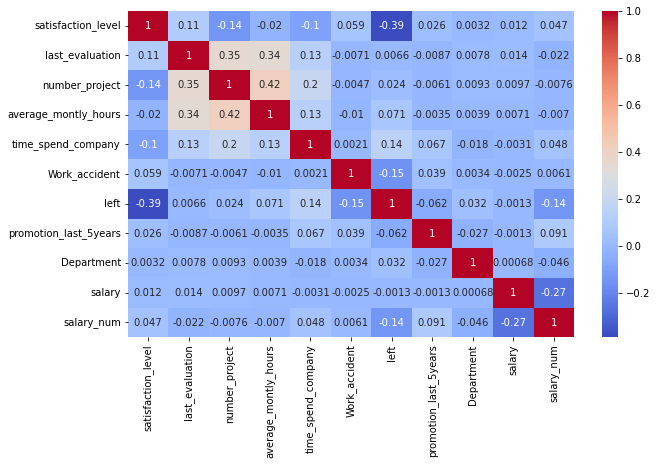

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(hr.corr(),annot=True,cmap='coolwarm')

In [43]:
cross_val_score(modeltree,X,y,cv=10,scoring='accuracy')

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [28]:
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

In [29]:
from sklearn import tree
max_depth = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for val in max_depth:
    score = cross_val_score(tree.DecisionTreeRegressor(max_depth= val, random_state= 88), X, y, cv= skf,
    scoring="neg_mean_squared_error")
    print(f'For max depth: {val}')
    rmse(score.mean())

For max depth: 1
rmse= 0.48
For max depth: 2
rmse= -0.00
For max depth: 3
rmse= -0.00
For max depth: 4
rmse= -0.00
For max depth: 5
rmse= -0.00
For max depth: 6
rmse= -0.00
For max depth: 7
rmse= -0.00
For max depth: 8
rmse= -0.00
For max depth: 9
rmse= -0.00
For max depth: 10
rmse= -0.00
For max depth: 11
rmse= -0.00
For max depth: 12
rmse= -0.00
For max depth: 13
rmse= -0.00
For max depth: 14
rmse= -0.00
For max depth: 15
rmse= -0.00


In [30]:
modeltree=DecisionTreeRegressor(max_depth=2)

In [31]:
modeltree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=2)

In [32]:
modeltree.score(X_test,y_test)

1.0

[Text(0.6, 0.8333333333333334, 'X[8] <= 0.604\nsquared_error = 0.388\nsamples = 11249\nvalue = 1.347'),
 Text(0.4, 0.5, 'X[8] <= -0.298\nsquared_error = 0.249\nsamples = 10339\nvalue = 1.465'),
 Text(0.2, 0.16666666666666666, 'squared_error = 0.0\nsamples = 5531\nvalue = 1.0'),
 Text(0.6, 0.16666666666666666, 'squared_error = 0.0\nsamples = 4808\nvalue = 2.0'),
 Text(0.8, 0.5, 'squared_error = 0.0\nsamples = 910\nvalue = 0.0')]

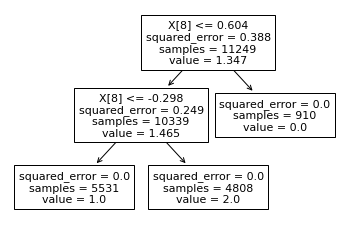

In [33]:
tree.plot_tree(modeltree)

In [34]:
y_pred=modeltree.predict(X_test)
y_pred

array([2., 1., 1., ..., 1., 1., 0.])

In [35]:
confusion_matrix(y_test,y_pred)

array([[ 327,    0,    0],
       [   0, 1785,    0],
       [   0,    0, 1638]], dtype=int64)

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       327
           1       1.00      1.00      1.00      1785
           2       1.00      1.00      1.00      1638

    accuracy                           1.00      3750
   macro avg       1.00      1.00      1.00      3750
weighted avg       1.00      1.00      1.00      3750



In [37]:
modelcl=DecisionTreeClassifier(max_depth=4)

In [38]:
modelcl.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [39]:
y_pred1=modelcl.predict_proba(X_test)

In [41]:
y_pred1.shape

(3750, 3)

In [42]:
y_test

2650     2
9142     1
4496     1
10251    2
3658     0
        ..
4164     0
3766     2
7627     1
8116     1
13414    0
Name: salary, Length: 3750, dtype: int32